In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- We are going to find major causes of attrition in employees. Attrition results in lack of productivity which reults in lack of profit ,which ultimately leads to unemployment. It seems simple to point out few factors behind attrition such as low wages, working environment,relationship with boss etc, but actually there are a lot more from one's personal reason to his education. And this is where Statistics come in. This field of concern is so wide thatit has given birth to new ML research called "Interpretability".

In [14]:
# To see respective format files (.csv,.xlsx,.png,..)

import glob
glob.glob('*.csv')

['HR_Employee_Attrition_Data.csv']

In [108]:
attrition = pd.read_csv('HR_Employee_Attrition_Data.csv')

In [109]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [110]:
attrition.shape

(2940, 35)

In [111]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
Age                         2940 non-null int64
Attrition                   2940 non-null object
BusinessTravel              2940 non-null object
DailyRate                   2940 non-null int64
Department                  2940 non-null object
DistanceFromHome            2940 non-null int64
Education                   2940 non-null int64
EducationField              2940 non-null object
EmployeeCount               2940 non-null int64
EmployeeNumber              2940 non-null int64
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null object
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobLevel                    2940 non-null int64
JobRole                     2940 non-null object
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null object
MonthlyIncome         

In [112]:
# To check Null values

attrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- There are no null values in the data

In [113]:
# Few of the predictors are useless carrying same value for all the observations ,thus having no significance 
# in the desired output variable .

In [114]:
# The count of employee is same for all the employees.so,their is no significance

attrition.EmployeeCount.value_counts()

1    2940
Name: EmployeeCount, dtype: int64

In [115]:
# It's unique to all the Observations in the data.Its no use in the data

attrition.EmployeeNumber.value_counts()

2047    1
1082    1
1078    1
1076    1
1074    1
1072    1
1070    1
1068    1
1066    1
1064    1
1062    1
1060    1
1058    1
1056    1
1054    1
1052    1
1050    1
1048    1
1046    1
1044    1
1042    1
1080    1
1084    1
1038    1
1086    1
1124    1
1122    1
1120    1
1118    1
1116    1
       ..
469     1
2516    1
467     1
2514    1
465     1
2512    1
463     1
2530    1
483     1
2532    1
495     1
503     1
2550    1
501     1
2548    1
499     1
2546    1
497     1
2544    1
2542    1
485     1
493     1
2540    1
491     1
2538    1
489     1
2536    1
487     1
2534    1
2049    1
Name: EmployeeNumber, Length: 2940, dtype: int64

In [116]:
# All the Employees are over18 and this variable won't give any information to the data

attrition.Over18.value_counts()

Y    2940
Name: Over18, dtype: int64

In [117]:
# It's also fixed value for all the other variables.so, its also won't helpful to the data 

attrition.StandardHours.value_counts()

80    2940
Name: StandardHours, dtype: int64

In [118]:
attrition.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace = True)

### Data Exploration

In [119]:
attrition.Attrition.value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

In [120]:
# Replacing Attrition output by integer constants

attrition.loc[attrition['Attrition']=='No','Attrition'] = 0
attrition.loc[attrition['Attrition']=='Yes','Attrition'] = 1

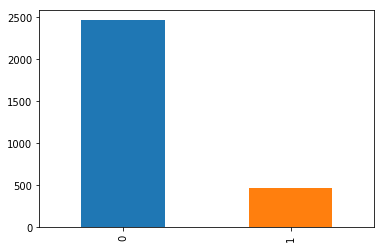

In [121]:
attrition.Attrition.value_counts().plot(kind = 'bar')

### Data Visualization 

In [122]:
attrition.Department.value_counts()

Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64

In [123]:
attrition['Sales']=0
attrition['R&D']=0
attrition['Dept_Human Resources'] =0

attrition.loc[attrition['Department']=='Sales','Sales'] = 1
attrition.loc[attrition['Department']=='Research & Development','R&D'] = 1
attrition.loc[attrition['Department']=='Human Resources','Dept_Human Resources'] = 1

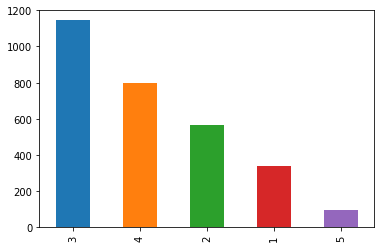

In [124]:
attrition.Education.value_counts().plot(kind = 'bar')

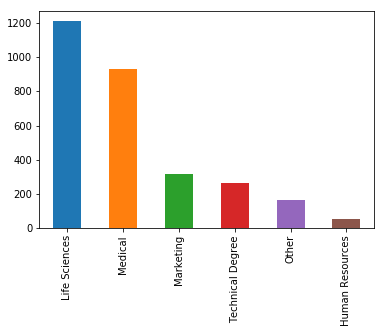

In [125]:
attrition.EducationField.value_counts().plot(kind = 'bar')

In [126]:
attrition['Life Sciences']=0
attrition['Medical']=0
attrition['Marketing']=0
attrition['Technical Degree']=0
attrition['Education Human Resources']=0
attrition['Education_Other']=0

attrition.loc[attrition['EducationField']=='Life Sciences','Life Sciences'] = 1
attrition.loc[attrition['EducationField']=='Medical','Medical'] = 1
attrition.loc[attrition['EducationField']=='Other','Education_Other'] = 1
attrition.loc[attrition['EducationField']=='Technical Degree','Technical Degree'] = 1
attrition.loc[attrition['EducationField']=='Human Resources','Education Human Resources'] = 1
attrition.loc[attrition['EducationField']=='Marketing','Marketing'] = 1

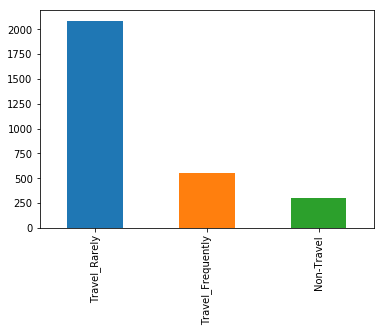

In [127]:
attrition.BusinessTravel.value_counts().plot(kind = 'bar')

In [128]:
attrition['Business_Travel_Rarely']=0
attrition['Business_Travel_Frequently']=0
attrition['Business_Non-Travel']=0

attrition.loc[attrition['BusinessTravel']=='Travel_Rarely','Business_Travel_Rarely'] = 1
attrition.loc[attrition['BusinessTravel']=='Travel_Frequently','Business_Travel_Frequently'] = 1
attrition.loc[attrition['BusinessTravel']=='Non-Travel','Business_Non-Travel'] = 1

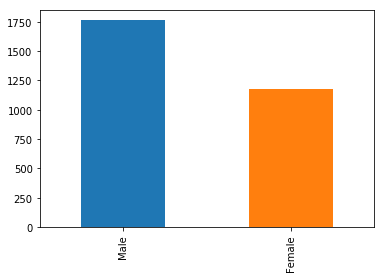

In [129]:
attrition.Gender.value_counts().plot(kind = 'bar')

In [130]:
attrition.loc[attrition['Gender']=='Male','Gender'] = 1
attrition.loc[attrition['Gender']=='Female','Gender'] = 0

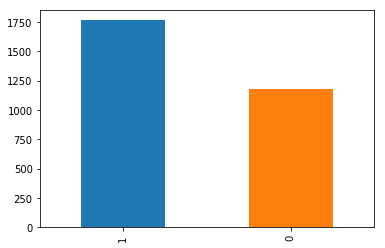

In [131]:
attrition.Gender.value_counts().plot(kind = 'bar')

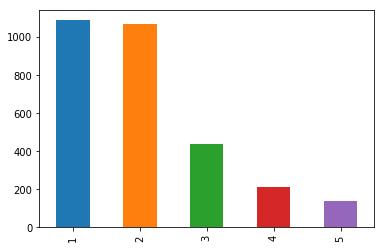

In [132]:
attrition.JobLevel.value_counts().plot(kind = 'bar')

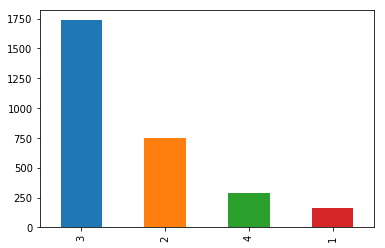

In [133]:
attrition.JobInvolvement.value_counts().plot(kind = 'bar')

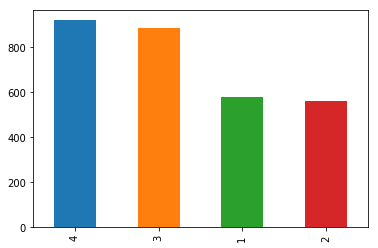

In [134]:
attrition.JobSatisfaction.value_counts().plot(kind = 'bar')

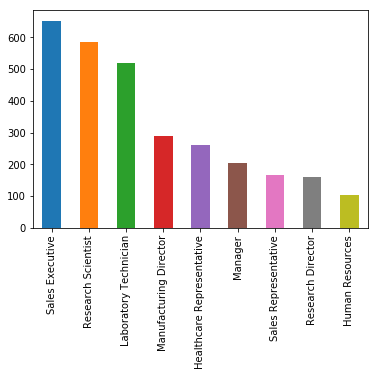

In [135]:
attrition.JobRole.value_counts().plot(kind = 'bar')

In [136]:
attrition['Research Scientist']=0
attrition['Laboratory Technician']=0
attrition['Sales Executive']=0
attrition['Manufacturing Director']=0
attrition['Healthcare Representative']=0
attrition['Sales Representative']=0
attrition['Research Director']=0
attrition['Manager'] = 0
attrition['Job_Human_Resources'] = 0

attrition.loc[attrition['JobRole']=='Research Scientist','Research Scientist'] = 1
attrition.loc[attrition['JobRole']=='Laboratory Technician','Laboratory Technician'] = 1
attrition.loc[attrition['JobRole']=='Sales Executive','Sales Executive'] = 1
attrition.loc[attrition['JobRole']=='Sales Representative','Sales Representative'] = 1
attrition.loc[attrition['JobRole']=='Manufacturing Director','Manufacturing Director'] = 1
attrition.loc[attrition['JobRole']=='Healthcare Representative','Healthcare Representative'] = 1
attrition.loc[attrition['JobRole']=='Research Director','Research Director'] = 1
attrition.loc[attrition['JobRole']=='Manager','Manager'] = 1
attrition.loc[attrition['JobRole']=='Human Resources','Job_Human_Resources'] = 1

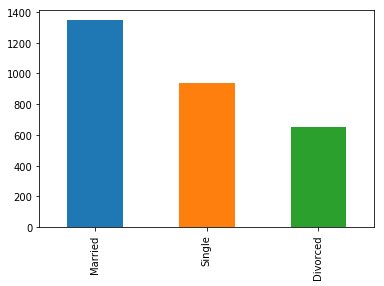

In [137]:
# Categorising on the basis of Marital Satus of Employee

attrition.MaritalStatus.value_counts().plot(kind = 'bar')

In [138]:
attrition['Marital_single']=0
attrition['Marital_married']=0
attrition['Marital_divorced']=0

attrition.loc[attrition['MaritalStatus']=='Married','Marital_married'] = 1
attrition.loc[attrition['MaritalStatus']=='Single','Marital_single'] = 1
attrition.loc[attrition['MaritalStatus']=='Divorced','Marital_divorced'] = 1

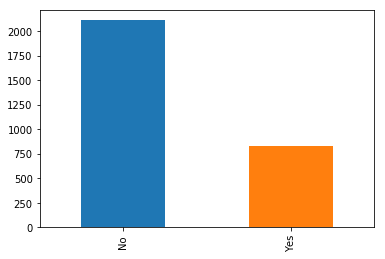

In [139]:
# Setting up the Over Time predictor

attrition.OverTime.value_counts().plot(kind = 'bar')

In [140]:
attrition.loc[attrition['OverTime']=='No','OverTime'] = 0
attrition.loc[attrition['OverTime']=='Yes','OverTime'] = 1

In [142]:
# Checking for useless predictor variables and removing them

attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,Sales Executive,Manufacturing Director,Healthcare Representative,Sales Representative,Research Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,1,0,0,0,0,0,0,1,0,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,...,0,0,0,0,0,0,0,0,1,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,...,0,0,0,0,0,0,0,1,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,...,0,0,0,0,0,0,0,0,1,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,0,0,0,0,0,0,0,0,1,0


In [143]:
attrition.drop(['BusinessTravel','EducationField',
                        'Department','JobRole','MaritalStatus'],axis=1,inplace = True)

In [144]:
# Converting datatypes of some predictor variables

attrition.dtypes

Age                           int64
Attrition                     int64
DailyRate                     int64
DistanceFromHome              int64
Education                     int64
EnvironmentSatisfaction       int64
Gender                        int64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobSatisfaction               int64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany                int64
YearsInCurrentRole            int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
Sales                         int64
R&D                         

In [145]:
attrition['Attrition'] = attrition['Attrition'].astype('int')
attrition['Gender'] = attrition['Gender'].astype('int')
attrition['OverTime'] = attrition['OverTime'].astype('int')

In [146]:
attrition.dtypes

Age                           int64
Attrition                     int32
DailyRate                     int64
DistanceFromHome              int64
Education                     int64
EnvironmentSatisfaction       int64
Gender                        int32
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobSatisfaction               int64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int32
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany                int64
YearsInCurrentRole            int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
Sales                         int64
R&D                         

In [147]:
attrition.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,Sales Executive,Manufacturing Director,Healthcare Representative,Sales Representative,Research Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced
0,41,1,1102,1,2,2,0,94,3,2,...,1,0,0,0,0,0,0,1,0,0
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,0,0,0,0,0,0,1,0,0
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,0,0,0,0,0,0,0,0,1,0


In [148]:
y = attrition['Attrition']

In [149]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [150]:
attrition.drop(['Attrition'],axis=1,inplace = True)

In [151]:
attrition.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Sales Executive,Manufacturing Director,Healthcare Representative,Sales Representative,Research Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced
0,41,1102,1,2,2,0,94,3,2,4,...,1,0,0,0,0,0,0,1,0,0
1,49,279,8,1,3,1,61,2,2,2,...,0,0,0,0,0,0,0,0,1,0
2,37,1373,2,2,4,1,92,2,1,3,...,0,0,0,0,0,0,0,1,0,0
3,33,1392,3,4,4,0,56,3,1,3,...,0,0,0,0,0,0,0,0,1,0
4,27,591,2,1,1,1,40,3,1,2,...,0,0,0,0,0,0,0,0,1,0


In [163]:
# Import the train_test_split method

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(attrition, y, train_size=0.8, random_state=0)


C:\Users\kovvu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [164]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [166]:
rf = RandomForestClassifier(**rf_params)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [167]:
rf_predictions = rf.predict(X_test)

In [170]:
print("Accuracy score: {}".format(accuracy_score(y_test, rf_predictions)))
print("="*100)
print(classification_report(y_test, rf_predictions))

Accuracy score: 0.8435374149659864
             precision    recall  f1-score   support

          0       0.84      1.00      0.91       488
          1       1.00      0.08      0.15       100

avg / total       0.87      0.84      0.78       588



In [174]:
import pandas as pd
feature_imp = pd.Series(rf.feature_importances_,index=attrition.columns).sort_values(ascending=False)
feature_imp

OverTime                      0.125278
MonthlyIncome                 0.084725
TotalWorkingYears             0.070169
YearsAtCompany                0.068969
Age                           0.067385
StockOptionLevel              0.060751
JobLevel                      0.057999
Marital_single                0.041842
YearsWithCurrManager          0.041500
EnvironmentSatisfaction       0.032531
Business_Travel_Frequently    0.026712
YearsInCurrentRole            0.026693
DistanceFromHome              0.025125
DailyRate                     0.023218
JobSatisfaction               0.021580
MonthlyRate                   0.020583
Sales Representative          0.019618
JobInvolvement                0.018433
HourlyRate                    0.017318
NumCompaniesWorked            0.015686
WorkLifeBalance               0.014144
PercentSalaryHike             0.012882
Sales                         0.009335
YearsSinceLastPromotion       0.008735
TrainingTimesLastYear         0.008484
RelationshipSatisfaction 

No handles with labels found to put in legend.


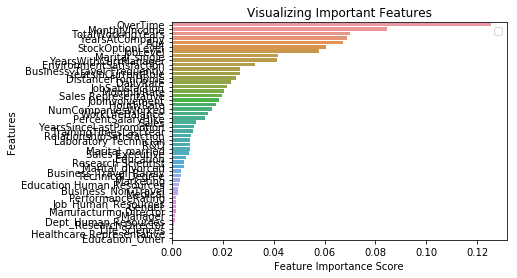

In [175]:
import seaborn as sns

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [178]:

# Split dataset into features and labels
X=attrition[['OverTime','MonthlyIncome','TotalWorkingYears','YearsAtCompany','Age','StockOptionLevel','JobLevel','Marital_single','YearsWithCurrManager','EnvironmentSatisfaction','Business_Travel_Frequently','YearsInCurrentRole','DistanceFromHome','DailyRate','JobSatisfaction','MonthlyRate',
'Sales Representative','JobInvolvement','HourlyRate','NumCompaniesWorked','WorkLifeBalance','PercentSalaryHike']]
                                      
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=0) 

C:\Users\kovvu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [179]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9659863945578231


In [182]:
from sklearn.neural_network import MLPClassifier


In [193]:
mlp = MLPClassifier(activation='relu', alpha=1e-5,  solver = 'sgd', hidden_layer_sizes=(100))

In [194]:
mlp

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [195]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [196]:
predictions = mlp.predict(X_test)

In [197]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
accuracy_score(y_test, predictions)

0.8231292517006803

In [198]:
print(confusion_matrix(y_test, predictions))

[[484   0]
 [104   0]]


In [199]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.82      1.00      0.90       484
          1       0.00      0.00      0.00       104

avg / total       0.68      0.82      0.74       588



C:\Users\kovvu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  


- Random Forest Performs well compared to Neural Network Model